#### Fast Fourier Transformation (2D)

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
# SECTION : SUBSECTION
    # (markdown introduction)
    # METHODS : DESCRIPTION
    # PARAMETERS : DESCRIPTION
    # COMPUTATIONS : DESCRIPTION
    # OUTPUTS : DESCRIPTION

#### FFT (2D) : Interpolation

In [3]:
# Methods

def fft_interp_vec(coeffs, xv): # 1d fft interpolation
    
    size = len(coeffs)
    
    kn = np.fft.fftfreq(size)
    
    eikx = np.exp(2.j * np.pi * size * np.outer(xv, kn))
    
    return np.einsum('ab, b... -> a...', eikx, coeffs) / size

def runge_function(x, y):
    
    return 1/(1 + 25* (x**2 + y**2))

def psy(x):
    
    return 2 * x - 1

def phi(y):
    
    return y / 2 + 0.5

# Gauß Lobatto points

def cheb(x):
    
    return - np.cos(np.pi * x)

def cheb_inv(y):
    
    return - np.arccos(y) / np.pi

In [4]:
# Parameters : Interpolation grid (equidistant nodes)

deg_x = deg_y = 12 * 1000

x_nodes = np.linspace(-1.0, 1.0, deg_x) # cheb(phi(np.linspace(-1.0, 1.0, deg_x))) 
y_nodes = np.linspace(-1.0, 1.0, deg_y) # cheb(phi(np.linspace(-1.0, 1.0, deg_y)))

X, Y = np.meshgrid(x_nodes, y_nodes)

In [5]:
# Computations : Perform FFT

start1 = time.time()

# Evaluate original Runge function

Z = runge_function(X, Y)

# Perform fast Fourier transformation

Z_fft = np.fft.fftn(Z)

end1 = time.time()

In [6]:
# Computations : Runtime

runtime_i = np.round((end1 - start1)*10e5)/10e2

In [7]:
# Outputs : Runtime

print(f"Interpolation runtime = {runtime_i}ms")

Interpolation runtime = 33668.322ms


#### FFT (2D) : Evaluation

In [8]:
# Computations : Evaluation of FFT

N = 150

x = y = np.linspace(0.0, 1.0, N)

X, Y = np.meshgrid(psy(x), psy(y)) # np.meshgrid(cheb(x), cheb(y))

gt = runge_function(X, Y)

# Reconstruct

start2 = time.time()

Z_rec = fft_interp_vec(coeffs = Z_fft.T, xv = x).T
Z_rec = fft_interp_vec(coeffs = Z_rec, xv = y).T.real

end2 = time.time()

In [9]:
# Computations : Runtime

runtime_e = np.round((end2-start2)*10e5)/10e2

In [10]:
# Computations : Relative MSRE, relative MRE amd the AOC

rel_eps = np.abs(((Z_rec-gt)/gt).reshape(-1))

msre = np.mean(rel_eps**2)

mre = np.max(rel_eps)

aoc = Z_fft.shape[0] * Z_fft.shape[1]

In [11]:
# Outputs : Runtime evaluation

print(f"Evaluation time = {runtime_e}ms")

Evaluation time = 270535.783ms


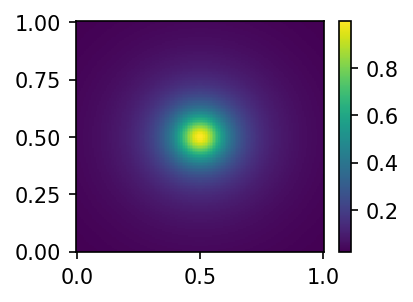

In [12]:
# Outputs : Original runge function (ground truth)

fig, ax = plt.subplots(1, 1, figsize=(8/3, 2), dpi=150)

im = ax.pcolormesh(x, y, gt)
fig.colorbar(im, ax=ax)
ax.set_title('');

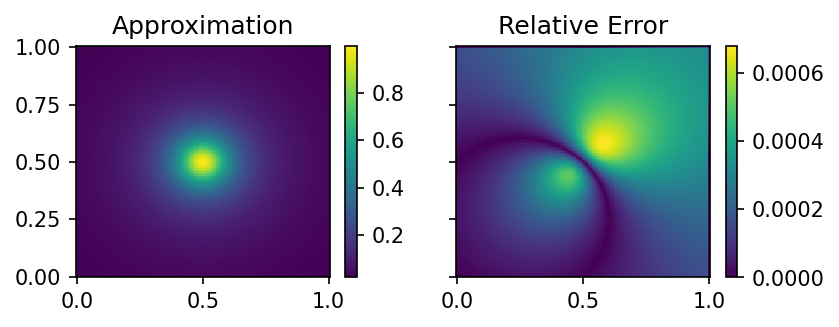

In [13]:
# Outputs : Approximation and pointwise relative error

fig, axs = plt.subplots(1, 2, figsize=(6, 2), sharex=True, sharey=True, gridspec_kw={'hspace': 0.6}, dpi=150)

im = axs[0].pcolormesh(x, y, Z_rec, cmap='viridis')
fig.colorbar(im, ax=axs[0])
axs[0].set_title('Approximation', fontsize = 12)

im = axs[1].pcolormesh(x, y, np.abs((Z_rec - gt) / gt), cmap='viridis')
fig.colorbar(im, ax=axs[1])
axs[1].set_title('Relative Error', fontsize = 12)

plt.show()

In [14]:
# Output : Relative MSRE, relative MRE and the AOC

print(f'Mean Squared Relative Error = {msre}')
print(f'Maximal Relative Error = {mre}')
print(f'Amount of Coefficients = {aoc}')

Mean Squared Relative Error = 7.565486245508856e-08
Maximal Relative Error = 0.0006779844948908997
Amount of Coefficients = 144000000
